In [1]:
pip install scikit-learn
pip install matplotlib
pip install pandas

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as ps
import math

In [6]:
#Load the data into pandas dataframe
X_og = ps.read_csv("accent-mfcc-data-1.data", header=None)
X_pd = X_og.copy()

target_labels = ["ES", "FR", "GE", "IT", "UK", "US"]

#Replace the target labels with numerical values

for i in range(len(X_pd)):
    if (X_pd.iloc[i,0] == "ES"):
        X_pd.iloc[i,0] = 0
    elif(X_pd.iloc[i,0] == "FR"):
        X_pd.iloc[i,0] = 1
    elif(X_pd.iloc[i,0] == "GE"):
        X_pd.iloc[i,0] = 2
    elif(X_pd.iloc[i,0] == "IT"):
        X_pd.iloc[i,0] = 3
    elif(X_pd.iloc[i,0] == "UK"):
        X_pd.iloc[i,0] = 4
    else:
        X_pd.iloc[i,0] = 5

#Retrieve targets and add into a numpy array

y_temp = X_pd.iloc[:,0]
y = y_temp.to_numpy()

#Retrieve data without the targets and add into a numpy array
without_labels = X_pd.drop(X_pd.columns[0], axis=1)
X = without_labels.to_numpy()




In [7]:
#Function to computte the PCA decomposition
def components(dataset, number):
    U,D,V = np.linalg.svd(dataset, full_matrices=False)
    return V[:number, :]

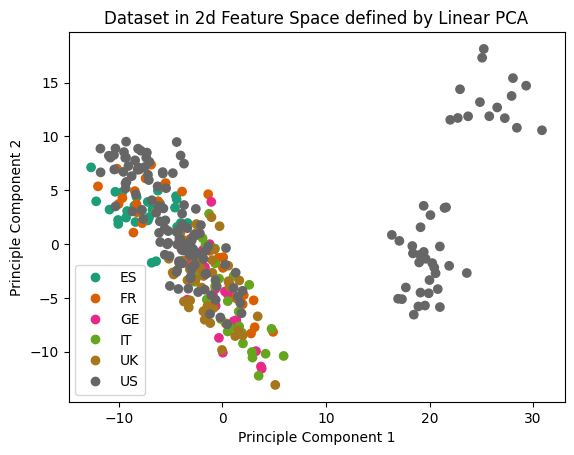

In [8]:
#Center the data

centered_X = X - X.mean(axis=0)

#Compute the new basis Z of the data using PCA to find the 
#top 2 principle components and multiplying that with the centered data

W = components(centered_X, 2)
Z = np.matmul(centered_X, W.T)

zrows, zcols = Z.shape

#Plot the datapoints in the new basis according to their class

scatter = plt.scatter(Z[:,0], Z[:,1], c=y, cmap='Dark2')
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.title("Dataset in 2d Feature Space defined by Linear PCA")
plt.legend(handles=scatter.legend_elements()[0], labels=["ES", "FR", "GE", "IT", "UK", "US"])
plt.show()


In [168]:
#Multiclass Perceptron

def perceptron(X, y):
    rows, cols = (6, X.shape[1]+1)
    #rows, cols = (10, X.shape[1]+1)
    w = [[0 for i in range(cols)] for j in range(rows)]
    for element in w:
        element[X.shape[1]] = 1

    biasCol = np.ones((X.shape[0],1), dtype=int)
    newX = np.hstack((X, biasCol))

    for i in range(10):
        fVIndices = np.arange(329)
        #fVIndices = np.arange(1797)
        np.random.shuffle(fVIndices)
        for fVI in fVIndices:
            fV = newX[fVI]
            dict = {}
        
            for k in range (len(w)):
                val = np.matmul(w[k],fV)
                dict[k] = val
            
            y_current = max(dict, key=dict.get)
            y_target = y[fVI]

            if (y_current != y_target):
                w[y_current] = w[y_current] - (fV*0.2)
                w[y_target] = w[y_target] + (fV*0.2)

    errSum = 0
    fVIndices = np.arange(329)
    #fVIndices = np.arange(1797)
    np.random.shuffle(fVIndices)
    for fVI2 in fVIndices:
        dict = {}
        fV2 = newX[fVI2]
            
        for k in range (len(w)):
            val = np.matmul(w[k],fV2)
            dict[k] = val
                
        y_current = max(dict, key=dict.get)
        y_target = y[fVI2]

        if (y_current != y_target):
            errSum+=1

    return errSum

In [142]:
from sklearn.datasets import load_digits

CLASSES=10
digits = load_digits(n_class=CLASSES)
X_dig = digits.data
y_dig = digits.target

#print(X_dig.shape)
#print(y_dig.shape)

errorDigits = perceptron(X_dig,y_dig)
accuracyDigits = round(((1797-errorDigits)/1797)*100, 2)
print("Original Feature Space Accuracy: " + str(accuracyDigits) + "%")

(1797, 64)
Original Feature Space Accuracy: 100.0%


In [170]:
centered_X = X - X.mean(axis=0)
errorOG = perceptron(centered_X,y)
accuracyOG = round(((329-errorOG)/329)*100, 2)
print("Original Feature Space Accuracy: " + str(accuracyOG) + "%")

for i in range(2, 13):
    W = components(centered_X,i)
    Z = np.matmul(centered_X, W.T)

    errors = perceptron(Z,y)
    accuracy = round(((329-errors)/329)*100, 2)
    print(str(i)+"d Feature Space Accuracy:" + str(accuracy) + "%")



Original Feature Space Accuracy: 66.26%
2d Feature Space Accuracy:39.82%
3d Feature Space Accuracy:50.76%
4d Feature Space Accuracy:46.2%
5d Feature Space Accuracy:50.15%
6d Feature Space Accuracy:52.28%
7d Feature Space Accuracy:45.9%
8d Feature Space Accuracy:60.18%
9d Feature Space Accuracy:58.36%
10d Feature Space Accuracy:59.27%
11d Feature Space Accuracy:65.65%
12d Feature Space Accuracy:72.34%


In [171]:
row, cols = centered_X.shape
vals = []

for i in range(cols):
    var = np.var(centered_X[:, i])
    vals.append(var)
                
maxVar = max(vals)
minVar = min(vals)

epsilon = 0.05

gammaMin = 1/(2*(maxVar+epsilon))
gammaMax = 1/(2*(minVar+epsilon))

gammas = []

gammaCurrent = gammaMin
while (gammaCurrent <= gammaMax):
    gammas.append(gammaCurrent)
    gammaCurrent+=0.010
    

In [172]:
errorMatrix = np.full((330,7), 0)
A = np.full((row,row), 1/row)
for g in range (len(gammas)):
    K = np.zeros((row, row))
    for i in range(row):
        for j in range(row):
            dist = np.linalg.norm(centered_X[i,:]-centered_X[j,:])
            distsqrd = pow(dist,2)
            val = math.exp(-(gammas[g]*distsqrd))
            K[i][j] = val

    norK = K - (np.matmul(A,K)) - (np.matmul(K,A)) + np.matmul(np.matmul(A,K),A)
    for p in range(13, 330):
        V = components(norK, p)
        Z = np.matmul(norK, V.T)
        error = perceptron(Z,y)
        errorMatrix[p][g] = error
        



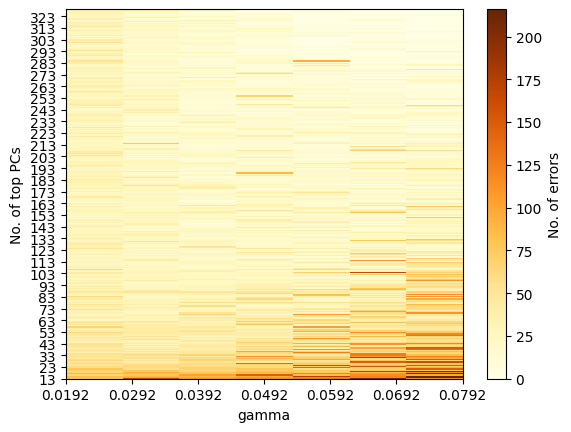

In [173]:
colormap = plt.cm.get_cmap('YlOrBr')
plt.imshow(errorMatrix[13:], interpolation='none', aspect='auto', extent=[0.0192,0.0792,329,13], cmap=colormap)
plt.gca().xaxis.tick_bottom()
plt.xlabel("gamma")
plt.ylabel("No. of top PCs")
plt.gca().invert_yaxis()
cbar = plt.colorbar()
cbar.set_label('No. of errors')
plt.xticks(np.arange(0.0192, 0.0792, 0.010))
plt.yticks(np.arange(13, 329, 10))
plt.show()

In [174]:
for i in range(13,errorMatrix.shape[0]):
    if (0 in errorMatrix[i,:]):
        print("Minimum Number of PCs that allows linearly separating the data : " + str(i))
        for j in range(len(errorMatrix[i,:])):
            if (errorMatrix[i,j] == 0):
                print("Value of gamma that allows linearly separating the data : " + str(gammas[j]))
                break
        break

Minimum Number of PCs that allows linearly separating the data : 284
Value of gamma that allows linearly separating the data : 0.05920499723800104
